In [1]:
import numpy as np
from scipy.signal import stft
from matplotlib import pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages 

from joint import Joint
import bvh

In [2]:
# data_path = '../data/1111/straight_1_Take_001.bvh'
# data_path = '../data/1111/slice_data/slice_1_Take_001.bvh'
data_path = '../data/ikuno/straight/straight_1_Take_001.bvh'
data, fs, text = bvh.bvhreader(data_path)

In [3]:
print(data.shape)

(219, 180)


In [64]:
window_num = 120
stride_num = 2        

freq, t, F = stft(data[:, 36], fs=120, nperseg=window_num, noverlap=(window_num-stride_num))
F_power = np.abs(F)
freqall = freq

F_powerall = np.power(F_power,2)

In [65]:
for i in range(2):
    freq, t, F = stft(data[:,i+37], fs=120, nperseg=window_num, noverlap=(window_num-stride_num))
    F_power = np.abs(F)
    freqall = freqall + freq

    F_powerall = F_powerall + np.power(F_power, 2)


In [66]:
freq = freqall / 3
F_power = np.sqrt(F_powerall)

# F_power = (F_power - np.min(F_power)) / np.max(F_power) - np.min(F_power)

In [67]:
print(freq.shape, F_power.shape, t.shape)

(61,) (61, 111) (111,)


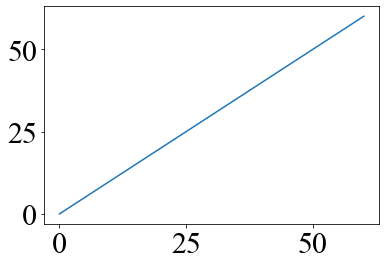

In [68]:
plt.plot(freq)

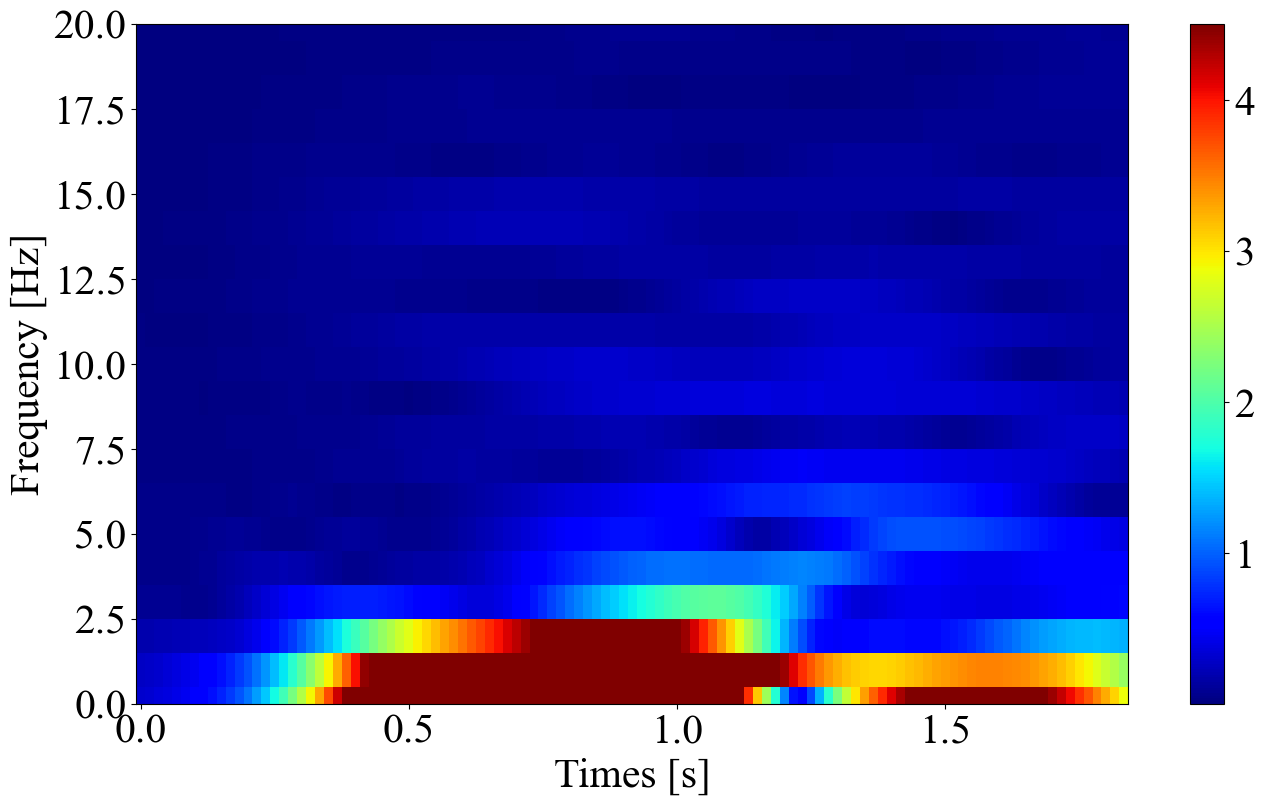

In [72]:
pdf = PdfPages('stft.pdf')

fig = plt.figure(dpi=100, figsize=(16, 9))
plt.rcParams["font.family"] = 'Times New Roman'
plt.rcParams['font.size'] = 30

ax = plt.axes()
ax.set_facecolor('white')

plt.pcolormesh(t, freq, F_power, cmap='jet', vmax=4.5)

# for i in range(61):
#     plt.scatter(t, freq, s=100, c=F_power[i, :], cmap='jet')

plt.ylim(0, 20)
plt.xlabel('Times [s]')
plt.ylabel('Frequency [Hz]')
plt.colorbar()

pdf.savefig(fig)
pdf.close()